# Singular Value Decomposition (SVD)

[[ 0.70710678 -0.70710678]
 [ 0.70710678  0.70710678]] [1.73205081 1.        ] [[ 4.08248290e-01  8.16496581e-01  4.08248290e-01]
 [ 7.07106781e-01  2.26762120e-16 -7.07106781e-01]
 [ 5.77350269e-01 -5.77350269e-01  5.77350269e-01]]


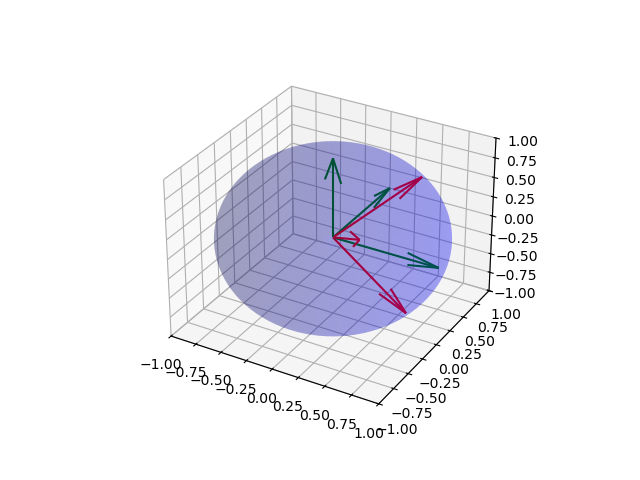

In [4]:
%matplotlib widget

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

A = np.array([
    [0, 1, 1],
    [1, 1, 0]
])

[U, S, Vt] = np.linalg.svd(A)

print(U, S, Vt)

# Initialize a unit sphere of points
phi, theta = np.mgrid[0:2*np.pi:100j, 0:np.pi:50j]
x = np.sin(theta) * np.cos(phi)
y = np.sin(theta) * np.sin(phi)
z = np.cos(theta)
coords = np.array([x.flatten(), y.flatten(), z.flatten()])

# Transform unit sphere by Vt
coords_rotated = Vt @ coords

# Visualize rotated unit sphere
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(coords_rotated[0].reshape(x.shape), coords_rotated[1].reshape(y.shape), coords_rotated[2].reshape(z.shape), color='b', alpha=0.2)
ax.quiver(0, 0, 0, 1, 0, 0, color='g')
ax.quiver(0, 0, 0, 0, 1, 0, color='g')
ax.quiver(0, 0, 0, 0, 0, 1, color='g')
ax.quiver(0, 0, 0, Vt[0, 0], Vt[0, 1], Vt[0, 2], color='r')
ax.quiver(0, 0, 0, Vt[1, 0], Vt[1, 1], Vt[1, 2], color='r')
ax.quiver(0, 0, 0, Vt[2, 0], Vt[2, 1], Vt[2, 2], color='r')
ax.set_xlim([-1, 1])
ax.set_ylim([-1, 1])
ax.set_zlim([-1, 1])
plt.show()

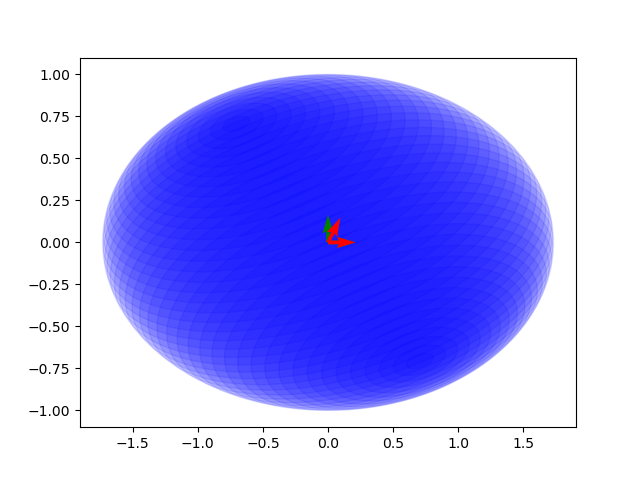

In [2]:
# Scale rotated unit sphere by S
smat = np.zeros((2, 3))
smat[:2, :2] = np.diag(S)

coords_scaled = smat @ coords_rotated

# Scale Vt by S
Vt_scaled = smat @ Vt

# Visualize scaled unit circle
fig = plt.figure()
ax = fig.add_subplot(111)
ax.fill(coords_scaled[0].reshape(x.shape), coords_scaled[1].reshape(y.shape), color='b', alpha=0.1)
ax.quiver(0, 0, 1, 0, color='g')
ax.quiver(0, 0, 0, 1, color='g')
ax.quiver(0, 0, Vt_scaled[0, 0], Vt_scaled[0, 1], color='r')
ax.quiver(0, 0, Vt_scaled[1, 0], Vt_scaled[1, 1], color='r')
plt.show()

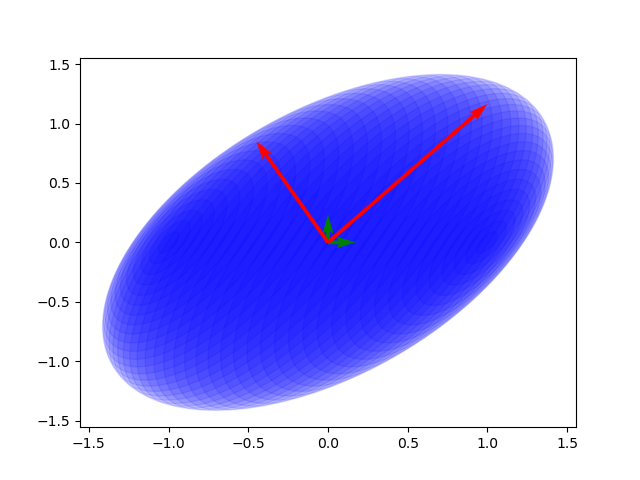

In [5]:
# Complete the transformation by multiplying by U
coords_final = U @ coords_scaled
Vt_final = U @ Vt_scaled

singular_vectors = A @ Vt

# Visualize final ellipse
fig = plt.figure()
ax = fig.add_subplot(111)
ax.fill(coords_final[0].reshape(x.shape), coords_final[1].reshape(y.shape), color='b', alpha=0.1)
ax.quiver(0, 0, 1, 0, color='g')
ax.quiver(0, 0, 0, 1, color='g')
ax.quiver(0, 0, singular_vectors[0, 0], singular_vectors[1, 0], color='r', scale=4)
ax.quiver(0, 0, singular_vectors[0, 1], singular_vectors[1, 1], color='r', scale=4)
plt.show()

In [12]:
A = np.array([
    [1, 1, 2],
    [1, 1, 2],
    [1, -1, 0]
])

[U, S, Vt] = np.linalg.svd(A, full_matrices=False)
print(U)
print(S)
print(Vt)
print(U @ np.diag(S))

[[-7.07106781e-01 -1.22036342e-16 -7.07106781e-01]
 [-7.07106781e-01 -5.16510226e-17  7.07106781e-01]
 [-1.83261751e-16  1.00000000e+00 -4.43378006e-17]]
[3.46410162e+00 1.41421356e+00 6.59614454e-17]
[[-4.08248290e-01 -4.08248290e-01 -8.16496581e-01]
 [ 7.07106781e-01 -7.07106781e-01  8.26128969e-17]
 [ 5.77350269e-01  5.77350269e-01 -5.77350269e-01]]
[[-2.44948974e+00 -1.72585450e-16 -4.66417853e-17]
 [-2.44948974e+00 -7.30455767e-17  4.66417853e-17]
 [-6.34837328e-16  1.41421356e+00 -2.92458541e-33]]
